# Control 1 INFO273-2021

### Pregunta 1 (3 puntos)
Se tienen trazas de la carga de trabajo en un cluster de servidores, de las cuales se ha extraído una muestra representativa de 20 trabajos, considerando por cada trabajo las principales medidas de uso de recursos del cluster.  La tabla "datosCarga.csv"  presenta las tasas de uso en 1 segundo de procesador, memoria y entrada/salida de la muestra de 20 trabajos.
Se trata de caracterizar la carga de trabajo utilizando la distancia euclídea como métrica de agrupamiento.
Para ello se solicita:

(i) Realizar el agrupamiento considerando la función hclust de R. Justifique los parámetros utilizados.

(ii) A partir del dendograma y los datos originales, decidir el número de grupos que es representativo de los distintos tipos de trabajos. Explique su decisión. 

(iii) Realizar un análisis de componentes principales con los datos  ¿Es representativo de los datos el primer plano principal? Justifique su respuesta.

(iv) Representar los grupos definidos en (ii) en el primer plano principal. Calcular los valores medios en cada grupo y realizar una interpretación de cada uno. ¿Se valida la decisión tomada en (ii)?



      CPU              Mem_usada        Mem_asignada        Mem_max       
 Min.   :0.0003004   Min.   :0.06787   Min.   :0.07556   Min.   :0.06787  
 1st Qu.:0.0005043   1st Qu.:0.08044   1st Qu.:0.08936   1st Qu.:0.08044  
 Median :0.0020430   Median :0.08600   Median :0.09680   Median :0.08667  
 Mean   :0.0134421   Mean   :0.08326   Mean   :0.09403   Mean   :0.08376  
 3rd Qu.:0.0344550   3rd Qu.:0.08731   3rd Qu.:0.09912   3rd Qu.:0.08862  
 Max.   :0.0384500   Max.   :0.09106   Max.   :0.10110   Max.   :0.09106  
    CPU_max             Disco          
 Min.   :0.005112   Min.   :0.0002146  
 1st Qu.:0.016178   1st Qu.:0.0004818  
 Median :0.026745   Median :0.0009642  
 Mean   :0.055023   Mean   :0.0137614  
 3rd Qu.:0.109675   3rd Qu.:0.0244625  
 Max.   :0.135300   Max.   :0.0715300  

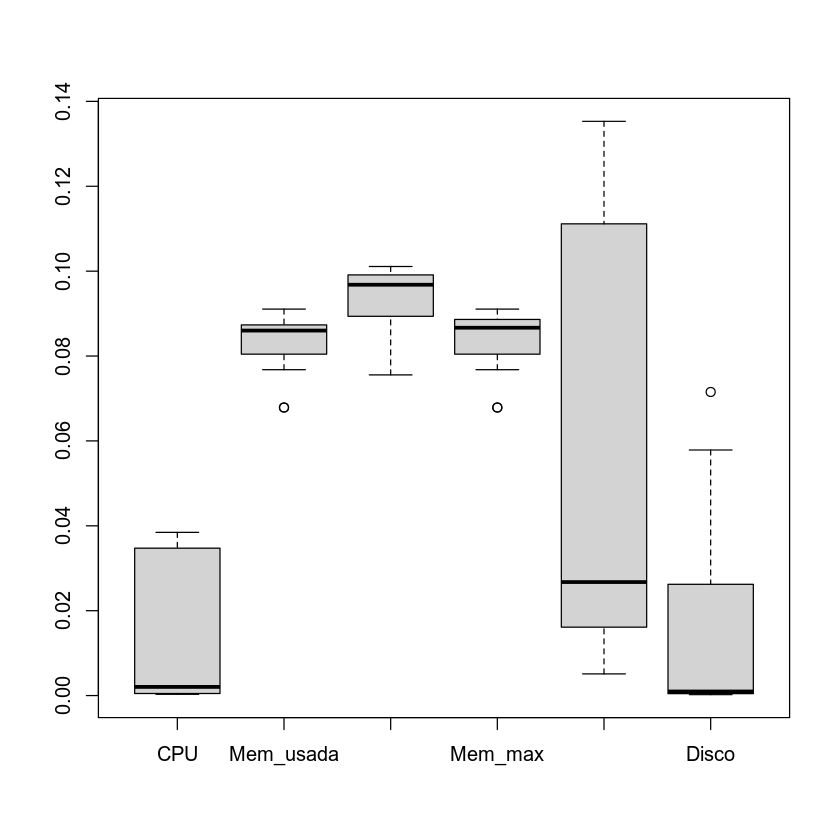

In [1]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #fila se utiliza 
#como vector de nombres de las columnas
datos1 <-read.table("datosCarga.csv",dec=".",sep=";",header=TRUE)
summary(datos1)
boxplot(datos1)

__(i). Realizar el agrupamiento considerando la función hclust de R. Justifique los parámetros utilizados.__

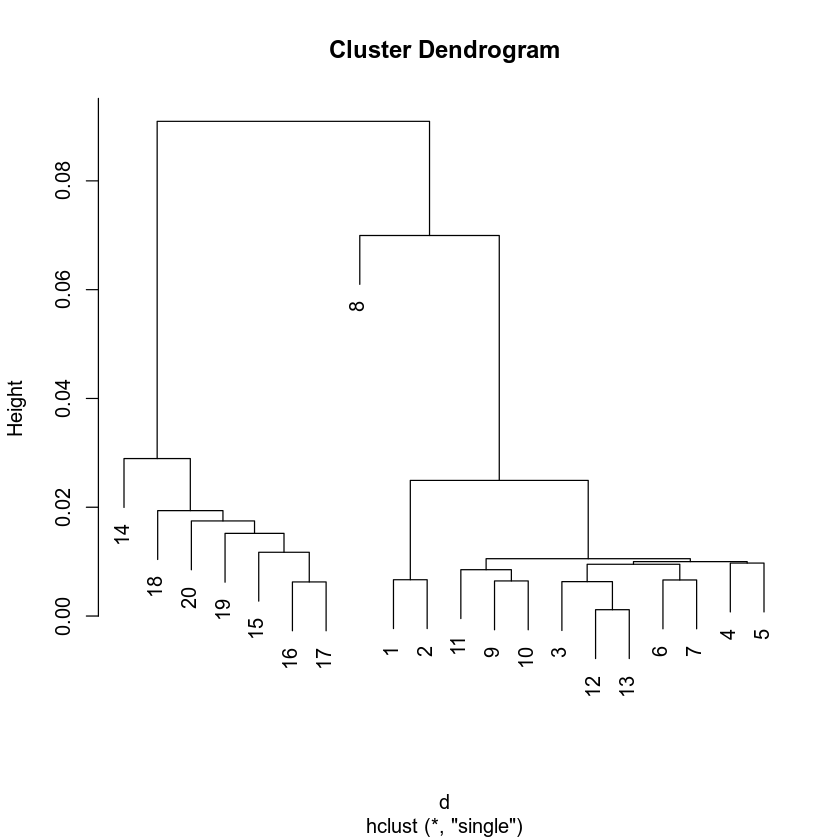

In [12]:
d <- dist(datos1)
hd <- hclust(d,method="single",members=NULL)
plot(hd,labels=NULL,sub=NULL,xlab=NULL,ylab="Height")

__R:__ Dado que no existe un parámetro que tenga más importancia que otro, y el hecho que queremos unos grupos más marcados para poder agruparlos mejor, se todo la decisión de usar ```single```.

__(ii) A partir del dendograma y los datos originales, decidir el número de grupos que es representativo de los distintos tipos de trabajos. Explique su decisión.__

In [3]:
print(datos1)

         CPU Mem_usada Mem_asignada Mem_max  CPU_max     Disco
1  0.0015620   0.06787      0.07568 0.06787 0.039670 0.0003567
2  0.0015680   0.06787      0.07556 0.06787 0.033020 0.0009289
3  0.0003071   0.08044      0.09521 0.08044 0.023770 0.0007858
4  0.0003004   0.08044      0.09521 0.08044 0.007919 0.0022850
5  0.0004606   0.07715      0.08740 0.07715 0.005112 0.0002146
6  0.0005188   0.07678      0.08740 0.07678 0.015080 0.0009289
7  0.0003805   0.08118      0.08936 0.08118 0.016240 0.0006428
8  0.0003271   0.08057      0.08936 0.08069 0.015990 0.0715300
9  0.0025180   0.09106      0.10110 0.09106 0.021210 0.0002146
10 0.0027050   0.09082      0.10010 0.09094 0.014890 0.0009995
11 0.0025330   0.09094      0.10080 0.09106 0.029720 0.0003567
12 0.0011710   0.08496      0.09521 0.08496 0.021450 0.0004997
13 0.0011900   0.08472      0.09521 0.08484 0.022580 0.0004282
14 0.0341800   0.08752      0.09839 0.08887 0.103000 0.0578600
15 0.0352800   0.08740      0.09900 0.08862 0.122900 0.

__R:__ En este caso se puede apreciar un comportamiento similar entre tres grupos claramente marcados. Estos serían:
* $K_1 = {14,18,20,19,15,16,17}$
* $K_2 = {8}$
* $K_3 = {1,2,11,9,10,3,12,13,6,7,4,5}$

In [4]:
cluster=cutree(hd, k=3)
cluster

[1] 1 1 1 1 1 1 1 2 1 1 1 1 1 3 3 3 3 3 3 3

__(iii) Realizar un análisis de componentes principales con los datos ¿Es representativo de los datos el primer plano principal? Justifique su respuesta.__

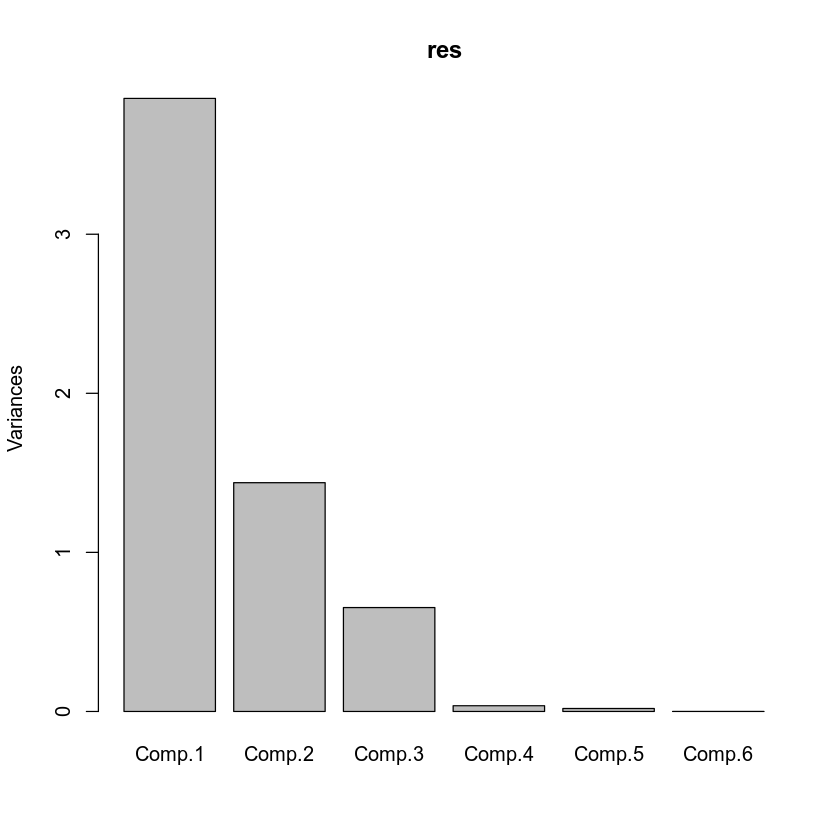

In [6]:
library(rattle)
res <- princomp(datos1, cor=TRUE)
plot(res)

In [7]:
summary(res)

Importance of components:
                          Comp.1    Comp.2    Comp.3      Comp.4      Comp.5
Standard deviation     1.9631203 1.1992289 0.8082586 0.189971373 0.136261607
Proportion of Variance 0.6423069 0.2396917 0.1088803 0.006014854 0.003094538
Cumulative Proportion  0.6423069 0.8819985 0.9908789 0.996893732 0.999988270
                             Comp.6
Standard deviation     8.389416e-03
Proportion of Variance 1.173038e-05
Cumulative Proportion  1.000000e+00

__R:__ Se puede ver que es representativo, ya que el plano general conserva un 88% de la varianza.

__(iv) Representar los grupos definidos en (ii) en el primer plano principal. Calcular los valores medios en cada grupo y realizar una interpretación de cada uno. ¿Se valida la decisión tomada en (ii)?__

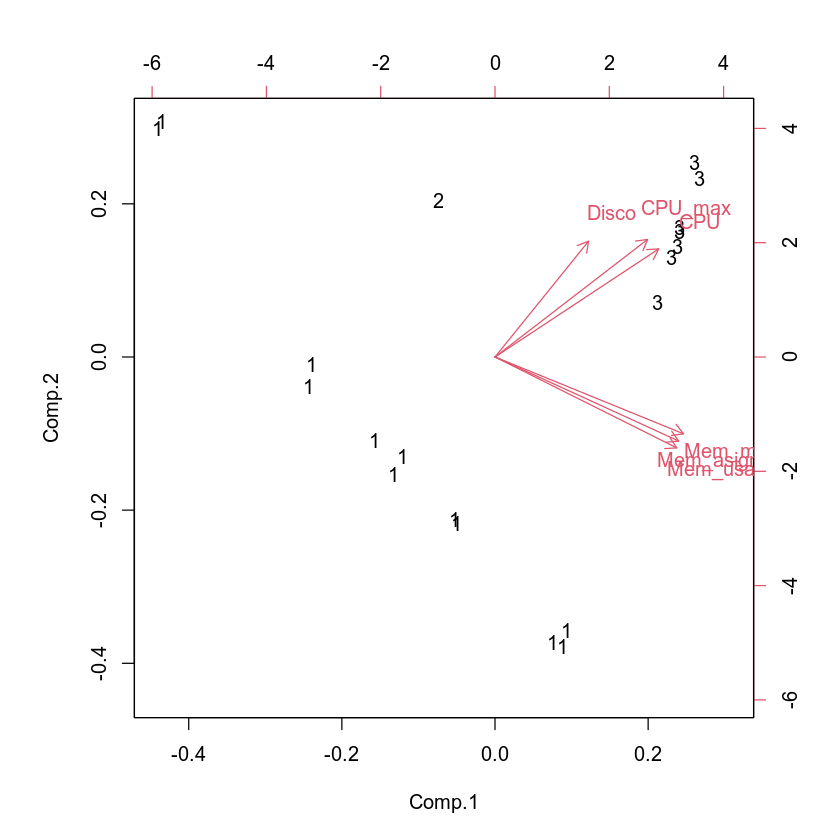

In [8]:
biplot(res,xlabs=cutree(hd,3))

__R:__ Se puede ver que la actvidad del grupo 1 está más alejada en cuanto a uso de disco, cpu y memoria, coincidiendo con los datos obtenidos en __(ii)__; análogo para el grupo 3, el cual posee un consumo mayor de estos recursos y esto aparece claramente indicado en el gráfico.
Con esto, se puede concluir que sí se valida la decisión tomada.

### Pregunta 2 (1 puntos)
Se ha medido el tiempo de respuesta en milisegundos que dos sistemas tardan en ejecutar 10 programas distintos (tabla "datosCompara.csv"). Se pide determinar si existe una diferencia estadísticamente significativa entre ambos sistemas.

   Programa  Sistema1  Sistema2
1         1 0.3735753 0.4392694
2         2 0.2808774 0.1452266
3         3 0.0054599 0.0041405
4         4 0.0381347 0.3679523
5         5 0.2356411 0.4143013
6         6 0.0801592 0.5203086
7         7 0.1548014 0.0358922
8         8 0.3624128 0.2634108
9         9 0.2869101 0.3128587
10       10 0.0797615 0.0496237


    Sistema1          Sistema2       
 Min.   :0.00546   Min.   :0.004141  
 1st Qu.:0.07986   1st Qu.:0.073524  
 Median :0.19522   Median :0.288135  
 Mean   :0.18977   Mean   :0.255298  
 3rd Qu.:0.28540   3rd Qu.:0.402714  
 Max.   :0.37358   Max.   :0.520309  

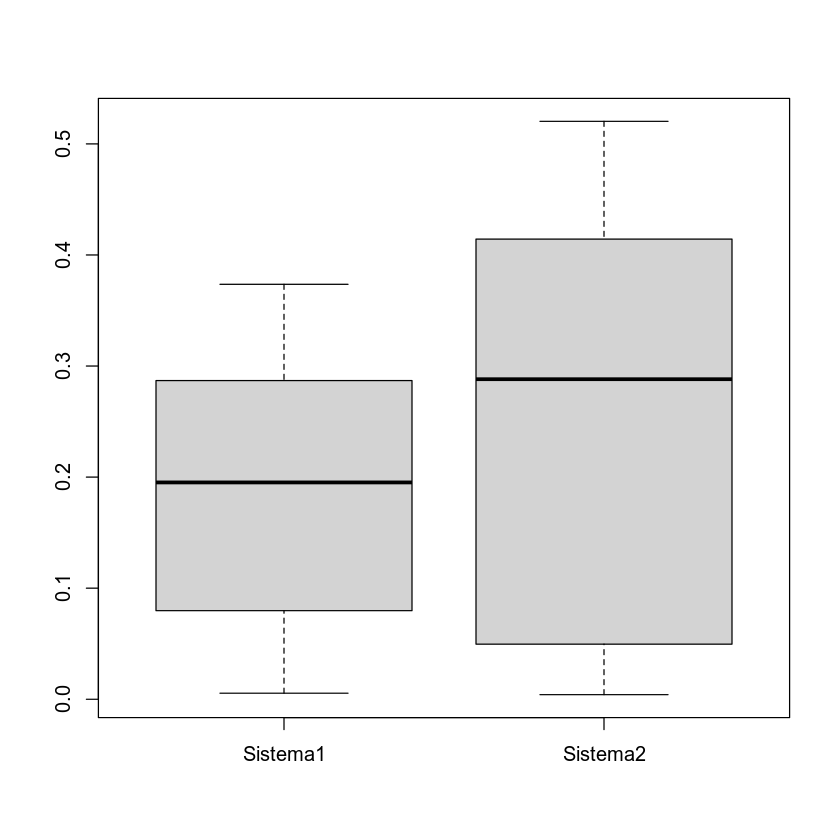

In [10]:
datos2 <-read.table("datosCompara.csv",dec=",",sep=";",header=TRUE)
print(datos2)
summary(datos2[,2:3])
boxplot(datos2[,2:3])

In [28]:
A = datos2[,2]
B = datos2[,3]
C = A-B
dbar = mean(C)
s = sd(C)
t= qt(0.975,9)
variacion = t * s/(10^0.5)
print(dbar+variacion)
print(dbar-variacion)

[1] 0.07346138
[1] -0.2045115


__R:__ Se puede ver que el intervalo calculado es de (0.07, -0.2), como este incluye el 0 podemos conlcuir que las diferencias no son significativas

### Pregunta 3 (2 puntos)

i) Explique brevemente los conceptos de  monitoreo y benchmark de sistemas computacionales. Indique sus principales características y diferencias.

ii) Para las herramientas que estudió en el taller de la unidad (tanto la que presentó como la que usó en el taller), realice un cuadro resumen que incluya principales características, ventajas y desventajas y  ámbitos de aplicación


__i) Explique brevemente los conceptos de monitoreo y benchmark de sistemas computacionales. Indique sus principales características y diferencias.__

El monitoreo permite ver en tiempo real distintas métricas del computador, como por ejemplo su uso de CPU, GPU, voltaje, etc. Por ejemplo, es posible conocer cuánta memoria RAM se está utilizando y que programas son los que más la usan.

En contraparte, el benchmark son pruebas de rendimiento para ver cómo se comporta el computador en distintas situaciones. Por ejemplo un test de estrés a la GPU nos permite conocer su rendimiento, forzándola  a trabajar un 100%

__ii) Para las herramientas que estudió en el taller de la unidad (tanto la que presentó como la que usó en el taller), realice un cuadro resumen que incluya principales características, ventajas y desventajas y ámbitos de aplicación__

* Ungine Benchmark: Test de GPU
    * Ventajas:
        * Realiza una carga a la tarjeta gráfica haciendo que esta utilice el 100% de su rendimiento.
        * Lo anterior, permite comparar las tarjetas gráficas para conocer su comportamiento en una situación extrema.
        * Se basa en un motor gráfico bastante popular y usado (Unreal Engine).
        * Dado que es multiplataforma, permite comparar el rendimiento de un mismo computador en distintos sistemas operativos.
    * Desventajas:
        * Al finalizar, no permite ver una tabla comparativa con otros computadores, por lo que es necesaria buscar tablas comparativas en internet.
        * No entrega mucha información general del sistema, ni la forma en que se obtiene el puntaje final.
    * Ámbitos de aplicación:
        * Para los que juegan videojuegos, se puede conocer cuánto puede rendir su tarjeta gráfica
        * En el análisis de datos, se puede conocer qué temperatura obtendrá la tarjeta gráfica en un uso total, por lo que es posible conocer de antemano su temperatura. De esta manera se puede refrigerar mejor el componente.
        * Además de lo anterior, también es posible conocer la cantidad de energía que consume. De esta manera saber si es rentable para usos prolongados      

* 7zip Benchmark: Test de CPU
    * Ventajas:
        * Permite elegir la cantidad de hilos de CPU con los que se desea trabajar
        * También, permite elegir el tamaño del diccionario a utilizar.
        * Depende de la RAM para su uso, por lo que es posible detectar inmediatamente un error en esta.
        * Entrega distintas métricas en tiempo real, por lo que se puede conocer inmediatamente el uso de distintos parámetros.
    * Desventajas:
        * La versión de Windows y Linux es distinta.
        * Al ser bien dependiente de la memoria RAM, esta puede afectar el rendimiento dependiendo de la velocidad que posea.
        * Al finalizar, no permite ver una tabla comparativa con otros computadores, por lo que es necesaria buscar tablas comparativas en internet.
    * Ambitos de aplicación:
        * Se puede conocer rápidamente cuanto a mejorado la CPU en caso de realizar un overclock
        * En caso de necesitar la ejecución de programas mononúcleo o multinúcleo, se puede saber rápidamente si conviene cierto modelo de CPU.